In [22]:
print(regional_pixels)

21290181


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

nc_file = nc.Dataset('AQUA_MODIS.20020101_20021231.L3m.YR.CHL.chlor_a.4km.nc', 'r')
chlorA_data = nc_file.variables['chlor_a'][:]
fill_value = -32767.0
chlorA_data = np.where(chlorA_data == fill_value, np.nan, chlorA_data)
test_chlorA_data=chlorA_data[:]

latitudes = nc_file.variables['lat'][:]
longitudes = nc_file.variables['lon'][:]
nc_file.close()

latitude_bands = {
    "30N-30S": (latitudes >= -30) & (latitudes <= 30),
    "60N-60S": (latitudes >= -60) & (latitudes <= 60),
    "90N-90S": np.full_like(latitudes, True, dtype=bool),
    "(30-60)N-(30-60)S": ((latitudes >= -60) & (latitudes <= -30)) | ((latitudes >= 30) & (latitudes <= 60)),
    "(60-90)N-(60-90)S": ((latitudes >= -90) & (latitudes <= -60)) | ((latitudes >= 60) & (latitudes <= 90))
}

value_ranges = [
    (0, 1), (0, 0.5), (0, 0.25), (0, 0.1),
    (0.02, 1), (0.02, 0.5), (0.02, 0.25), (0.02, 0.1)
]

def calculate_metrics(chlorA_data):
    mean_value = np.nanmean(chlorA_data)
    std_dev = np.nanstd(chlorA_data)
    percentiles = np.nanpercentile(chlorA_data, [50, 80, 90])
    return mean_value, std_dev, percentiles

test_chlorA_data=test_chlorA_data[test_chlorA_data !=fill_value]
regional_pixels = test_chlorA_data.size

for band_name, band_filter in latitude_bands.items():
    band_lat_indices = np.where(band_filter)[0]
    filtered_data = chlorA_data[band_lat_indices, :]

    for value_range in value_ranges:
        range_filter = (filtered_data >= value_range[0]) & (filtered_data <= value_range[1])
        valid_pixels = np.sum(range_filter)
        Fraction_Valid = valid_pixels / regional_pixels
        
        if valid_pixels > 0:
            filtered_values = filtered_data[range_filter]
            mean_value, std_dev, percentiles = calculate_metrics(filtered_values)
            print(f"\nLatitude Band: {band_name}")
            print(f"\nValue Range: {value_range}")
            print("regional_pixels",regional_pixels)
            print("valid_pixels",valid_pixels)
            print(f"Fraction Valid: {Fraction_Valid}")
            print(f"Mean: {mean_value}")
            print(f"Standard Deviation: {std_dev}")
            print(f"50th Percentile: {percentiles[0]}")
            print(f"80th Percentile: {percentiles[1]}")
            print(f"90th Percentile: {percentiles[2]}")
        else:
            print(f"\nValue Range: {value_range}")
            print("No data in this range.")



Latitude Band: 30N-30S

Value Range: (0, 1)
regional_pixels 21290181
valid_pixels 8967272
Fraction Valid: 0.4211928494172971
Mean: 0.13407954573631287
Standard Deviation: 0.13152682781219482
50th Percentile: 0.09573230892419815
80th Percentile: 0.1794948130846024
90th Percentile: 0.2692581951618197

Latitude Band: 30N-30S

Value Range: (0, 0.5)
regional_pixels 21290181
valid_pixels 8696795
Fraction Valid: 0.4084885422063814
Mean: 0.11748214066028595
Standard Deviation: 0.0901465192437172
50th Percentile: 0.09250044077634811
80th Percentile: 0.16875775754451752
90th Percentile: 0.22960747480392468

Latitude Band: 30N-30S

Value Range: (0, 0.25)
regional_pixels 21290181
valid_pixels 7966373
Fraction Valid: 0.37418061405865927
Mean: 0.09636162221431732
Standard Deviation: 0.05577041208744049
50th Percentile: 0.08399660885334015
80th Percentile: 0.1473961412906647
90th Percentile: 0.17928016781806944

Latitude Band: 30N-30S

Value Range: (0, 0.1)
regional_pixels 21290181
valid_pixels 4654

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

nc_file = nc.Dataset('AQUA_MODIS.20020101_20021231.L3m.YR.CHL.chlor_a.4km.nc', 'r')
chlorA_data = nc_file.variables['chlor_a'][:]
fill_value = -32767.0
chlorA_data = np.where(chlorA_data == fill_value, np.nan, chlorA_data)
test_chlorA_data=chlorA_data[:]

latitudes = nc_file.variables['lat'][:]
longitudes = nc_file.variables['lon'][:]
nc_file.close()

latitude_bands = {
    "(30-60)N-(30-60)S": ((latitudes >= -60) & (latitudes <= -30)) | ((latitudes >= 30) & (latitudes <= 60)),
    "(60-90)N-(60-90)S": ((latitudes >= -90) & (latitudes <= -60)) | ((latitudes >= 60) & (latitudes <= 90))
}

value_ranges = [
     (0,1),(0,2),(1,2)
]

def calculate_metrics(chlorA_data):
    mean_value = np.nanmean(chlorA_data)
    std_dev = np.nanstd(chlorA_data)
    percentiles = np.nanpercentile(chlorA_data, [50, 80, 90])
    return mean_value, std_dev, percentiles

test_chlorA_data=test_chlorA_data[test_chlorA_data>=0]
regional_pixels = test_chlorA_data.size

for band_name, band_filter in latitude_bands.items():
    band_lat_indices = np.where(band_filter)[0]
    filtered_data = chlorA_data[band_lat_indices, :]

    for value_range in value_ranges:
        range_filter = (filtered_data >= value_range[0]) & (filtered_data <= value_range[1])
        valid_pixels = np.sum(range_filter)
        Fraction_Valid = valid_pixels / regional_pixels
        
        if valid_pixels > 0:
            filtered_values = filtered_data[range_filter]
            mean_value, std_dev, percentiles = calculate_metrics(filtered_values)
            print(f"\nLatitude Band: {band_name}")
            print(f"\nValue Range: {value_range}")
            #print("regional_pixels",regional_pixels)
            print("valid_pixels:",valid_pixels)
            print(f"Fraction Valid: {Fraction_Valid}")
            print(f"Mean: {mean_value}")
            print(f"Standard Deviation: {std_dev}")
            print(f"50th Percentile: {percentiles[0]}")
            print(f"80th Percentile: {percentiles[1]}")
            print(f"90th Percentile: {percentiles[2]}")
        else:
            print(f"\nValue Range: {value_range}")
            print("No data in this range.")



Latitude Band: (30-60)N-(30-60)S

Value Range: (0, 1)
valid_pixels: 8388189
Fraction Valid: 0.3939933155100936
Mean: 0.24928806722164154
Standard Deviation: 0.17904305458068848
50th Percentile: 0.19326023757457733
80th Percentile: 0.3524430990219116
90th Percentile: 0.4937412202358246

Latitude Band: (30-60)N-(30-60)S

Value Range: (0, 2)
valid_pixels: 8711418
Fraction Valid: 0.40917538465267156
Mean: 0.29071861505508423
Standard Deviation: 0.27969449758529663
50th Percentile: 0.1989414095878601
80th Percentile: 0.3854548275470734
90th Percentile: 0.5832775771617889

Latitude Band: (30-60)N-(30-60)S

Value Range: (1, 2)
valid_pixels: 323229
Fraction Valid: 0.01518206914257798
Mean: 1.3658889532089233
Standard Deviation: 0.275549054145813
50th Percentile: 1.3027458190917969
80th Percentile: 1.6373360157012942
90th Percentile: 1.8001879453659058

Latitude Band: (60-90)N-(60-90)S

Value Range: (0, 1)
valid_pixels: 2442440
Fraction Valid: 0.11472142956417326
Mean: 0.3644688129425049
Stand


Latitude Band: 30N-30S

Value Range: (0, 1)
valid_pixels 19797901
Fraction_Valid:  0.929907594491564
Mean: 0.21131481230258942
Standard Deviation: 0.1874496191740036
50th Percentile: 0.15026403963565826
80th Percentile: 0.312269389629364
90th Percentile: 0.4803459048271179
max_frequency::  
6772706.0


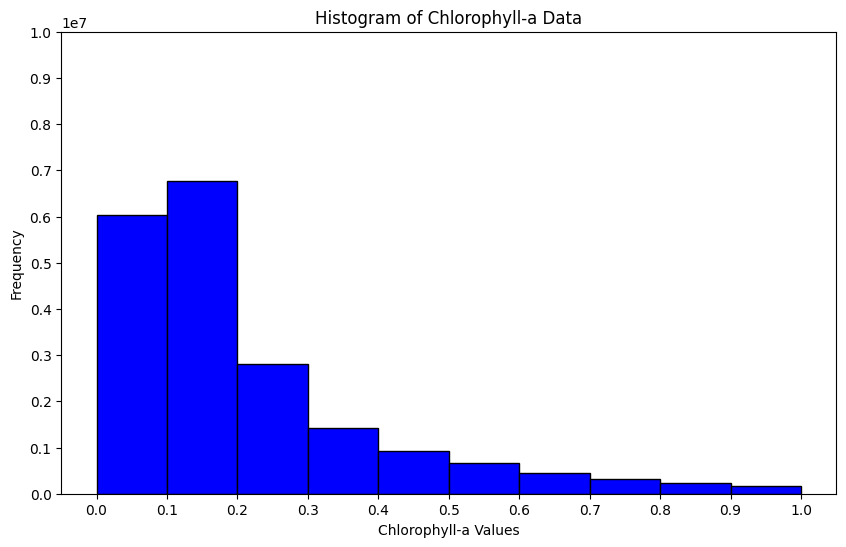

<Figure size 1000x600 with 0 Axes>

KeyboardInterrupt: 

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

def plot_histogram(chlorA_data, value_range):
    chlorA_data = chlorA_data[(chlorA_data >= value_range[0]) & (chlorA_data <= value_range[1])]
    
    plt.figure(figsize=(10,6))
    
    bins = np.linspace(value_range[0], value_range[1], 11)
    hist, bins, patches = plt.hist(chlorA_data, bins=bins, edgecolor='black', color='blue')
    
    plt.xticks(bins)
    
    y_max = max(hist)
    print(y_max)
    a =10**( len(str(int(y_max)))-1  )
    arr=np.array([])
    for i in range(11) :
        arr=np.append(arr,a*i)
    
    plt.yticks(arr)
    
    plt.xlabel('Chlorophyll-a Values')
    plt.ylabel('Frequency')
    plt.title('Histogram of Chlorophyll-a Data')
    
    plt.show()

import numpy as np
import matplotlib.pyplot as plt

def plot_cdf(value_range, chlorA_data):
    # Filter the data based on the value range
    filtered_data = chlorA_data[(chlorA_data >= value_range[0]) & (chlorA_data <= value_range[1])]
    
    # Sort the filtered data
    plt.figure(figsize=(10,6))
    sorted_data = np.sort(filtered_data)
    
    # Calculate the CDF values
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    # Plot the CDF
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_data, cdf, marker='.', linestyle='none')
    
    # Customize the plot
    plt.xlabel('Chlorophyll-a Values')
    plt.ylabel('CDF')
    plt.title('CDF of Chlorophyll-a Data')
    
    # Show the plot
    plt.grid(True)
    plt.show()

import numpy as np
import netCDF4 as nc

nc_file = nc.Dataset('AQUA_MODIS.20020101_20021231.L3m.YR.CHL.chlor_a.4km.nc', 'r')  # Open file in read mode

chlorA_data = nc_file.variables['chlor_a'][:]
fill_value1 = -32767.0
chlorA_data= np.where(~np.isnan(chlorA_data), chlorA_data, np.nan)
chlorA_data= chlorA_data[chlorA_data != fill_value1]
test_chlorA_data=chlorA_data[:]

latitudes = nc_file.variables['lat'][:]
fill_value2 = -999.0
nc_file.close()
latitudes = np.where(~np.isnan(latitudes), latitudes, np.nan)
latitudes = latitudes[latitudes != fill_value2]

latitude_bands = {
    "30N-30S": (latitudes >= -30) & (latitudes <= 30),
    "60N-60S": (latitudes >= -60) & (latitudes <= 60),
    "90N-90S": np.full_like(latitudes, True, dtype=bool)
    #"(30-60)N-(30-60)S": ( (latitudes>=-60) & (latitudes<=-30) & (latitudes>=30) & (latitudes<=60) )
}

value_ranges = [
    (0, 1), (0, 0.5), (0, 0.25), (0, 0.1),
    (0.01, 1), (0.01, 0.5), (0.01, 0.25), (0.01, 0.1)
]

def calculate_metrics(chlorA_data):
    mean_value = np.mean(chlorA_data)
    std_dev = np.std(chlorA_data)
    percentiles = np.percentile(chlorA_data, [50, 80, 90])
    return mean_value, std_dev, percentiles

test_chlorA_data=test_chlorA_data[test_chlorA_data !=fill_value1]
regional_pixels = test_chlorA_data.size

for band_name, band_filter in latitude_bands.items():
    filtered_latitudes = latitudes[band_filter]
    filtered_values=chlorA_data[:];
    
    for value_range in value_ranges:
        range_filter = (filtered_values >= value_range[0]) & (filtered_values <= value_range[1])
        filtered_data = filtered_values[range_filter]
        valid_pixels=filtered_data.shape[0]
        Fraction_Valid=valid_pixels/regional_pixels
        
        if len(filtered_data) > 0:
            mean_value, std_dev, percentiles = calculate_metrics(filtered_data)
            print(f"\nLatitude Band: {band_name}")
            print(f"\nValue Range: {value_range}")
            print("valid_pixels",valid_pixels)
            print(f"Fraction_Valid: ",Fraction_Valid)
            print(f"Mean: {mean_value}")
            print(f"Standard Deviation: {std_dev}")
            print(f"50th Percentile: {percentiles[0]}")
            print(f"80th Percentile: {percentiles[1]}")
            print(f"90th Percentile: {percentiles[2]}")
            print("max_frequency::  ")
            p=plot_histogram(chlorA_data, value_range)
            plot_cdf(value_range, chlorA_data)
        else:
            print(f"\nValue Range: {value_range}")
            print("No data in this range.")
